In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
df = pd.read_csv("iris.csv")
df.head(1)

SepalLength  SepalWidth  PetalLength  PetalWidth Species
0          5.1         3.5          1.4         0.2  setosa

In [8]:
# df["is_setosa"] = np.where(df["Species"] == "setosa", 1, 0)
df = df.assign(is_setosa = np.where(df["Species"] == "setosa", 1, 0))
df.head(2)

SepalLength  SepalWidth  PetalLength  PetalWidth Species  is_setosa
0          5.1         3.5          1.4         0.2  setosa          1
1          4.9         3.0          1.4         0.2  setosa          1

In [9]:
pd.crosstab(df["Species"], df["is_setosa"])

is_setosa    0   1
Species           
setosa       0  50
versicolor  50   0
virginica   50   0

In [10]:
model = RandomForestClassifier(random_state = 1)
model.fit(X = df.iloc[:, :4],
          y = df["is_setosa"])

RandomForestClassifier(random_state=1)

In [11]:
model.feature_importances_

array([0.16719532, 0.0104547 , 0.41872016, 0.40362982])

<AxesSubplot:>

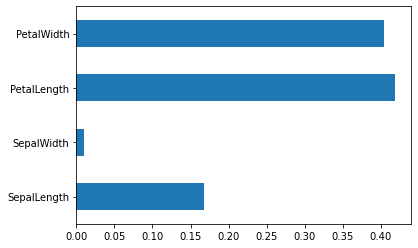

In [19]:
ser_imp = pd.Series(model.feature_importances_,
                    index = df.columns[:4])
ser_imp.plot.barh()

In [16]:
pred = model.predict_proba(df.iloc[:, :4])
pred[:3]

In [15]:
np.unique(pred[:, 1])

array([0.  , 0.03, 0.97, 0.98, 0.99, 1.  ])

In [18]:
pred_class = (pred[:, 1] > 0.5) + 0

from sklearn.metrics import accuracy_score
accuracy_score(df["is_setosa"], pred_class)

1.0

In [20]:
from sklearn.cluster import KMeans

In [23]:
df = pd.read_csv("iris.csv")
X = df.loc[:, :"PetalWidth"]
model = KMeans(n_clusters = 3, random_state = 123).fit(X)

In [24]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [25]:
df["cluster"] = model.labels_
df.head()

SepalLength  SepalWidth  PetalLength  PetalWidth Species  cluster
0          5.1         3.5          1.4         0.2  setosa        1
1          4.9         3.0          1.4         0.2  setosa        1
2          4.7         3.2          1.3         0.2  setosa        1
3          4.6         3.1          1.5         0.2  setosa        1
4          5.0         3.6          1.4         0.2  setosa        1

In [27]:
pd.crosstab(df["Species"], df["cluster"])

cluster      0   1   2
Species               
setosa       0  50   0
versicolor   2   0  48
virginica   36   0  14

<AxesSubplot:xlabel='SepalLength', ylabel='SepalWidth'>

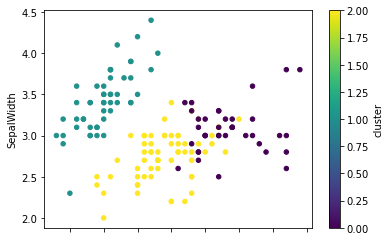

In [31]:
df.plot.scatter(x = "SepalLength", y = "SepalWidth", c = "cluster",
                colormap = "viridis")

In [32]:
from sklearn.metrics import silhouette_score

In [33]:
silhouette_score(X = X, labels = model.labels_,
                 random_state = 123)

0.5528190123564102

In [36]:
df = pd.read_csv("bank.csv", sep = ";")
df.head(2)

age         job  marital  education default  balance housing loan  \
0   30  unemployed  married    primary      no     1787      no   no   
1   33    services  married  secondary      no     4789     yes  yes   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no

### Q1. age, marital, education, default, balance, housing, loan 변수를 추출하여 df2 객체에 저장하시오.
※ "bank.csv" 파일의 데이터를 사용하시오.

In [38]:
df2 = df[["age", "marital", "education", "default", "balance", "housing", "loan"]]
df2.head(1)

age  marital education default  balance housing loan
0   30  married   primary      no     1787      no   no

### Q2. education 변수의 값이 "unknown" 인 데이터는 제거하고 각 원소를 자연수로 변경하시오.
※ "primary" -> 1, "secondary" -> 2, "tertiary" -> 3

In [41]:
df2 = df2.loc[df2["education"] != "unknown", ].reset_index(drop = True)
df2["education"] = df2["education"].replace(dict(primary = 1,
                                                 secondary = 2,
                                                 tertiary = 3))
df2["education"].unique()

array([1, 2, 3], dtype=int64)

### Q3. 수치형 변수와 education 변수를 제외한 나머지 범주형 변수를 전부 더미변수로 만드시오.
※ pd.get_dummies() 함수를 사용하며 drop_first 인자에 True를 할당 할 것.

In [44]:
df2_dum = pd.get_dummies(df2, drop_first = True)
df2_dum.head(2)

age  education  balance  marital_married  marital_single  default_yes  \
0   30          1     1787                1               0            0   
1   33          2     4789                1               0            0   

   housing_yes  loan_yes  
0            0         0  
1            1         1

### Q4. df2_dum 객체의 각 변수값을 표준화(standardization)하여 df2_dum_std 객체에 저장하시오.

In [47]:
from sklearn.preprocessing import StandardScaler
nor_std = StandardScaler()
df2_dum_std = nor_std.fit_transform(df2_dum)
df2_dum_std = pd.DataFrame(df2_dum_std, columns = df2_dum.columns)
df2_dum_std.head(1)

age  education   balance  marital_married  marital_single  \
0 -1.046435  -1.733668  0.125026         0.785598       -0.600983   

   default_yes  housing_yes  loan_yes  
0     -0.13089     -1.15439 -0.432894

### Q5. df2_dum_std 객체를 입력으로 하여 KMeans 군집분석을 실시하고 그 결과를 확인하시오.
※ 군집 개수는 3개로 설정하시오.  
※ random_state는 123으로 설정하시오.

In [51]:
from sklearn.cluster import KMeans
model1 = KMeans(n_clusters = 3, random_state = 123).fit(df2_dum_std)
df_model1_c = pd.DataFrame(model1.cluster_centers_, columns = df2_dum_std.columns)
df_model1_c.round(2)

age  education  balance  marital_married  marital_single  default_yes  \
0 -0.68       0.28     0.01            -1.27            1.66         0.02   
1  0.60      -0.04     0.09             0.44           -0.60        -0.02   
2 -0.01      -0.15    -0.07             0.47           -0.60        -0.00   

   housing_yes  loan_yes  
0        -0.07     -0.08  
1        -1.15      0.01  
2         0.87      0.05

In [57]:
from sklearn.metrics import silhouette_score
score_model1 = silhouette_score(df2_dum_std, labels = model1.labels_,
                                random_state = 123)
score_model1

0.25914235546669234

### Q6. df2_dum 객체를 입력으로 하여 KMeans 군집분석을 실시하고 그 결과를 확인하시오.
※ 군집 개수는 3개로 설정하시오.  
※ random_state는 123으로 설정하시오.

In [52]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = 3, random_state = 123).fit(df2_dum)
df_model2_c = pd.DataFrame(model2.cluster_centers_, columns = df2_dum.columns)
df_model2_c.round(2)

age  education   balance  marital_married  marital_single  default_yes  \
0  42.75       2.20   5253.41             0.63            0.26         0.00   
1  40.66       2.14    548.11             0.62            0.27         0.02   
2  45.00       2.44  18475.80             0.67            0.30        -0.00   

   housing_yes  loan_yes  
0         0.52      0.10  
1         0.58      0.17  
2         0.47      0.08

In [58]:
from sklearn.metrics import silhouette_score
score_model2 = silhouette_score(df2_dum, labels = model2.labels_,
                                random_state = 123)
score_model2

0.7682344484077592

### Q7. df2_dum_std 객체를 군집분석하는데 적절한 군집의 개수를 가늠하고자 한다. 군집의 개수를 2 부터 10까지 변화시키면서 모델을 생성하고 각 모델의 Silhouette Score를 계산하고 이를 표와 그래프로 구현하시오.
※ random_state는 123으로 지정하시오.

<AxesSubplot:>

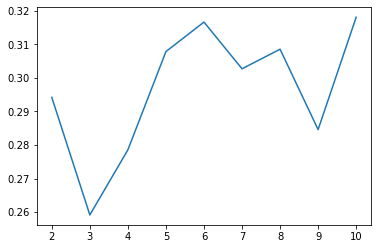

In [61]:
scores = []
for k in range(2, 11):
    model = KMeans(n_clusters = k, random_state = 123).fit(df2_dum_std)
    score_sub = silhouette_score(df2_dum_std, 
                                 labels = model.labels_,
                                 random_state = 123)
    scores = scores + [score_sub]
    
pd.Series(scores, index = range(2, 11)).plot.line()

<AxesSubplot:xlabel='k'>

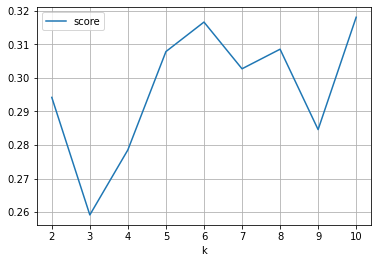

In [68]:
df_scores = pd.DataFrame()
for k in range(2, 11):
    model = KMeans(n_clusters = k, random_state = 123).fit(df2_dum_std)
    score_sub = silhouette_score(df2_dum_std, 
                                 labels = model.labels_,
                                 random_state = 123)
    df_scores_sub = pd.DataFrame(dict(k = [k], score = [score_sub]))
    df_scores = pd.concat([df_scores, df_scores_sub])
    
df_scores.set_index("k").plot.line(grid = True)

In [72]:
df = pd.read_csv("iris.csv")
X = df.drop("Species", axis = 1)

In [73]:
from sklearn.cluster import AgglomerativeClustering

In [75]:
model = AgglomerativeClustering(n_clusters = 3,
                                affinity = "euclidean",
                                linkage = "ward")
pred = model.fit_predict(X)

In [76]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [77]:
df["cluster"] = model.fit_predict(X)
df.head(2)

SepalLength  SepalWidth  PetalLength  PetalWidth Species  cluster
0          5.1         3.5          1.4         0.2  setosa        1
1          4.9         3.0          1.4         0.2  setosa        1

In [80]:
df.groupby("cluster").mean().reset_index()

cluster  SepalLength  SepalWidth  PetalLength  PetalWidth
0        0     5.920312    2.751562     4.420312    1.434375
1        1     5.006000    3.428000     1.462000    0.246000
2        2     6.869444    3.086111     5.769444    2.105556

In [81]:
from sklearn.mixture import GaussianMixture

In [83]:
pred = GaussianMixture(n_components = 3).fit_predict(X)

In [84]:
pred[:4]

array([1, 1, 1, 1], dtype=int64)

In [87]:
X["cluster"] = pred
X.groupby("cluster").mean().reset_index()

cluster  SepalLength  SepalWidth  PetalLength  PetalWidth
0        0     6.554545    2.950909     5.489091    1.989091
1        1     5.006000    3.428000     1.462000    0.246000
2        2     5.904444    2.775556     4.193333    1.293333

In [91]:
model = GaussianMixture(n_components = 3).fit(X)
pred = model.predict_proba(X)
pred[:3 ,]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

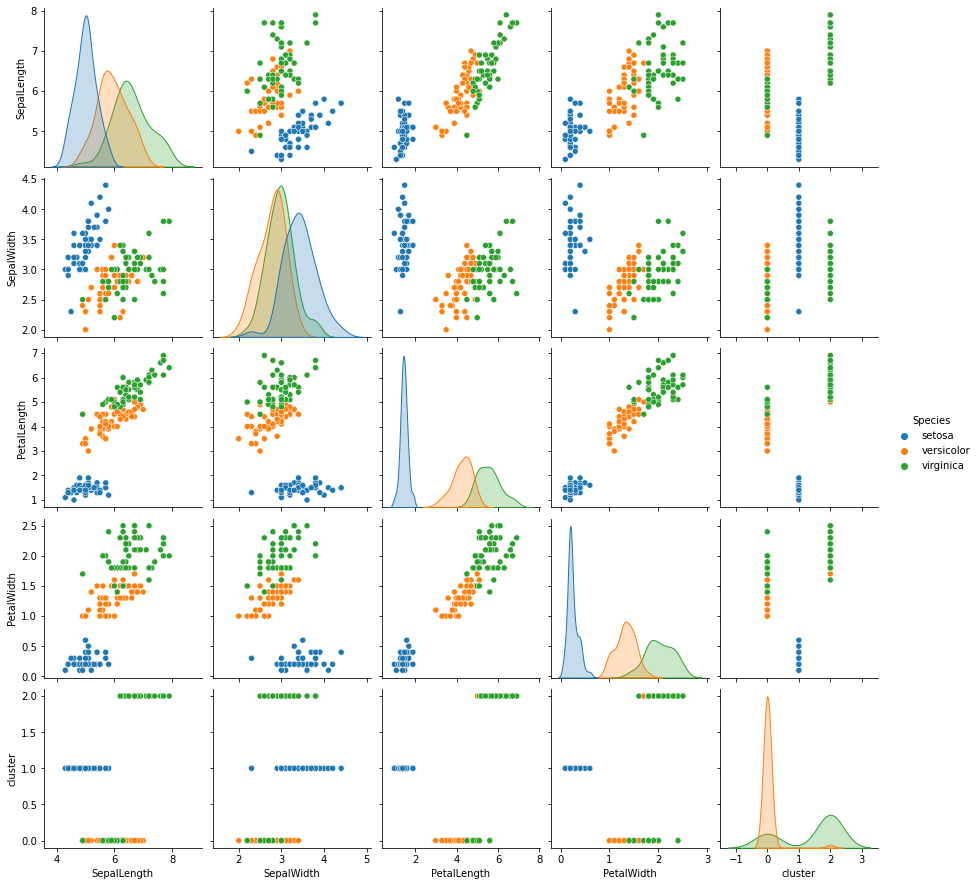

In [95]:
import seaborn as sns
sns.pairplot(df, hue = "Species")

In [96]:
df = pd.read_csv("iris.csv")
df.head(1)

SepalLength  SepalWidth  PetalLength  PetalWidth Species
0          5.1         3.5          1.4         0.2  setosa

In [97]:
from sklearn.cluster import DBSCAN

In [112]:
pred = DBSCAN(eps = 0.3).fit_predict(df.drop("Species", axis = 1))
pred[:3]

array([0, 0, 0], dtype=int64)

In [113]:
pd.Series(pred).value_counts()

-1    96
 0    37
 1    12
 2     5
dtype: int64

<AxesSubplot:xlabel='SepalLength', ylabel='SepalWidth'>

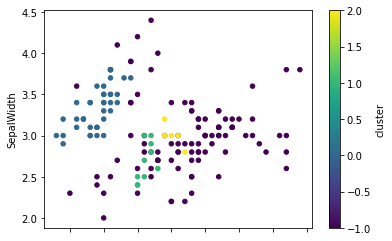

In [114]:
df_sub = df[["SepalLength", "SepalWidth"]].reset_index(drop = True)
df_sub["cluster"] = pred
df_sub.plot.scatter(x = "SepalLength", y = "SepalWidth",
                    c = "cluster", colormap = "viridis")

In [115]:
df_aws = pd.read_csv("AWS_sample.txt", sep = "#")
df_aws.head(1)

AWS_ID             TM    TA  Wind X.
0     108  2016-07-01 00  24.2   2.3  =

In [118]:
df_sub = df_aws.loc[df_aws["AWS_ID"] == 108, ].reset_index(drop = True)
df_sub["TM"] = pd.to_datetime(df_sub["TM"])
df_sub.head(1)

AWS_ID         TM    TA  Wind X.
0     108 2016-07-01  24.2   2.3  =

In [119]:
df_sub_idx = df_sub.set_index("TM")
df_sub_idx.head(1)

AWS_ID    TA  Wind X.
TM                               
2016-07-01     108  24.2   2.3  =

In [120]:
from statsmodels.tsa.seasonal import seasonal_decompose

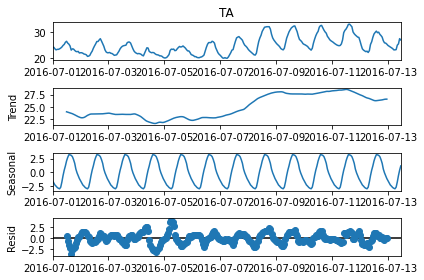

In [124]:
result = seasonal_decompose(df_sub_idx["TA"][:300])
result.plot();